# TP: Linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Exercice 1:


In [2]:
#1)
data_invest = pd.read_csv('invest.csv', sep=' ') #need for a god separation
data_invest.head()  # Affiche les 5 premières lignes du tableau

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


Index(['year', 'gnp', 'invest', 'cpi', 'interest'], dtype='object')


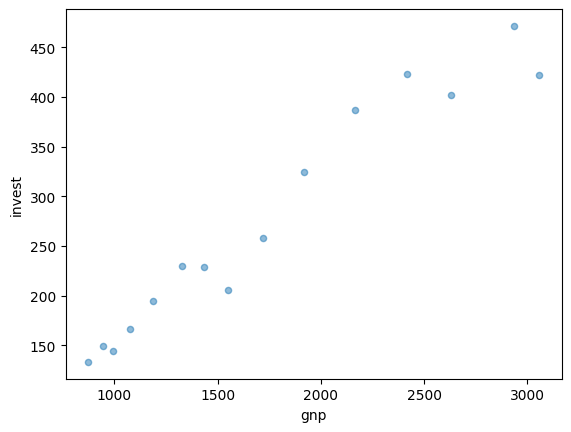

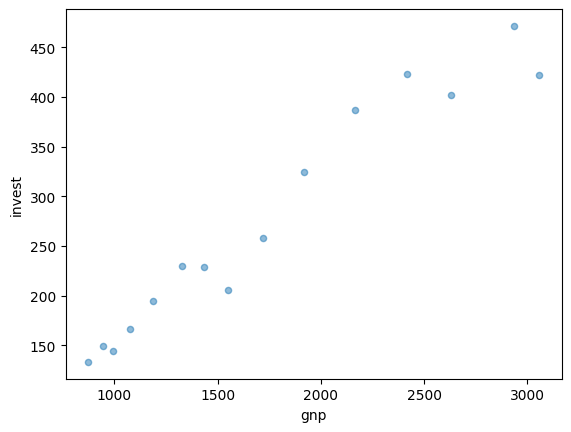

In [3]:
#2) Plot the GNP in function of the Investment 

# Display the names of the columns of the DataFrame
print(data_invest.columns)
# to be sure the columns do exist
if 'gnp' in data_invest.columns and 'invest' in data_invest.columns:
    data_invest.plot.scatter(x="gnp", y="invest", alpha=0.5)
    plt.show()
else:
    print("Les colonnes 'gnp' ou 'invest' n'existent pas dans le DataFrame.")

data_invest.plot.scatter(x="gnp",y="invest",alpha=0.5)
plt.show()

# Any plot created by pandas is a Matplotlib object.
# The .plot.* methods are applicable on both Series and DataFrames.

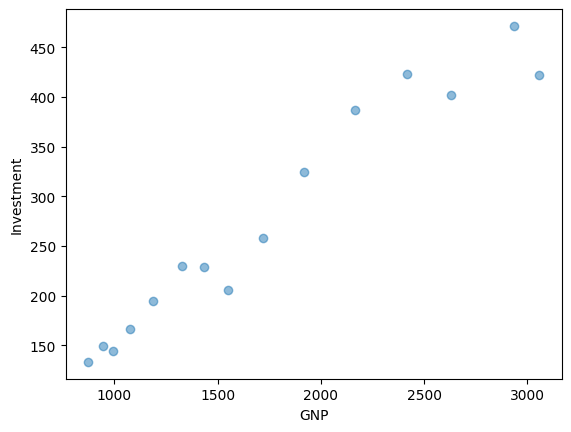

In [4]:
#2) Same question with scatter from plt

plt.scatter(data_invest["gnp"], data_invest["invest"], alpha=0.5)
plt.xlabel("GNP")
plt.ylabel("Investment")
plt.show()

In [5]:
# Logarithm transformation of the GNP and Investment columns 

data_invest["gnp"] = np.log(data_invest["gnp"])
data_invest["invest"]= np.log(data_invest["invest"])
data_invest.head()


,year,gnp,invest,cpi,interest
0,1968,6.772394,4.892602,82.54,5.16
1,1969,6.850126,5.005958,86.79,5.87
2,1970,6.900429,4.971201,91.45,5.95
3,1971,6.982492,5.114395,96.01,4.88
4,1972,7.078257,5.273000,100.00,4.50


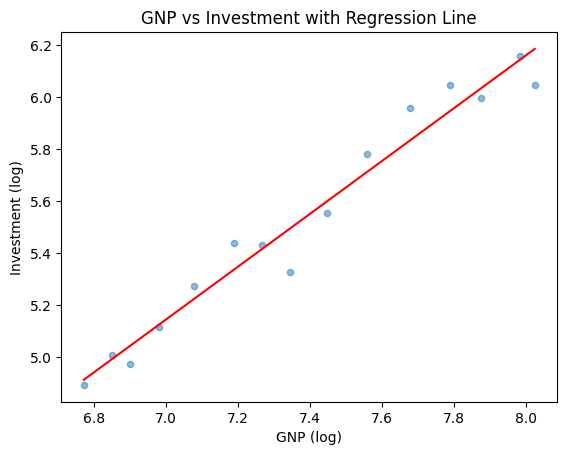

In [6]:
#3) 
# 1 dimensional case regression with OLS 
n = data_invest.shape[0] #shape tuple with first lines and then columns.
Y = data_invest["invest"]
x = data_invest["gnp"]
Y_mean = np.sum(Y)/n
x_mean = np.sum(x)/n

a = np.sum((x-x_mean)*(Y-Y_mean))
b = np.sum((x-x_mean)**2)
beta1_esti = a/b
beta0_esti = Y_mean - beta1_esti*x_mean

sigma_sqrd = np.sum((Y -(beta0_esti + beta1_esti*x))**2)/(n-2)

var_0 = sigma_sqrd*(1/n + (x_mean**2)/b)
var_1 = sigma_sqrd/b

Y_pred = beta0_esti + beta1_esti*x
R_sqrd = (np.sum((Y_pred - Y_mean)**2))/(np.sum((Y-Y_mean)**2))

ax = data_invest.plot.scatter(x="gnp", y="invest", alpha=0.5)

abs = np.linspace(min(data_invest["gnp"]), max(data_invest["gnp"]), 100)
ord = beta0_esti + beta1_esti * abs
plt.plot(abs, ord, color='red')

plt.xlabel('GNP (log)')
plt.ylabel('Investment (log)')
plt.title('GNP vs Investment with Regression Line')

plt.show()


In [7]:
# Output of the linear regression

table_result = pd.DataFrame({'beta0' : [beta0_esti], 'beta1' : [beta1_esti],'sigma0' : [np.sqrt(var_0)],'sigma1' : [np.sqrt(var_1)],'R_2' : [R_sqrd],}
                            , index=['linear_regression1'])
table_result.head()

,beta0,beta1,sigma0,sigma1,R_2
linear_regression1,-1.963591,1.015281,0.409547,0.055383,0.962757


In [8]:
import scipy.stats as stats
# 4) Test the significance of the slope using the Student-t test

# value of the test statistic 
val_stat_H0 = beta1_esti/np.sqrt(var_1)
print('Value of the test statistic: ', val_stat_H0)

p_value = 2*(1 - stats.t.cdf(val_stat_H0, n-2))
print('p-value: ', p_value)

Value of the test statistic:  18.331984456866678
p-value:  1.1363709973011282e-10


Thus the p-value is extremely low which allows to reject the $H0$ hypothesis. 

In [9]:
# 5) 


x_new = np.log(1000) #need to be careful with the log-transform in the linear regression
invest_pred = np.exp(beta0_esti +beta1_esti*x_new)
alpha = 0.1
t_quartile = stats.t.ppf(1-alpha/2,n-2)

CI_1 = invest_pred *np.exp(t_quartile*np.sqrt(sigma_sqrd)*np.sqrt(1/n + ((x_new-x_mean)**2)/b))
CI_0 = invest_pred *np.exp(- t_quartile*np.sqrt(sigma_sqrd)*np.sqrt(1/n + ((x_new-x_mean)**2)/b))

PI_1 = invest_pred*np.exp( t_quartile*np.sqrt(sigma_sqrd)*np.sqrt(1 + 1/n + ((x_new-x_mean)**2)/b))
PI_0 = invest_pred *np.exp(- t_quartile*np.sqrt(sigma_sqrd)*np.sqrt(1 + 1/n + ((x_new-x_mean)**2)/b))

print("Estimated necessary Investment:", invest_pred)
print("Confidence interval:", [CI_0,CI_1])
print("Prediction interval:", [PI_0,PI_1])

Estimated necessary Investment: 155.97942793105494
Confidence interval: [np.float64(146.67552673421957), np.float64(165.87349286827578)]
Prediction interval: [np.float64(132.00238933412942), np.float64(184.31167845087418)]


We can see that as expected we have a prediction interval that is bigger than the confidence interval since it takes into account the variability of the features as well. 

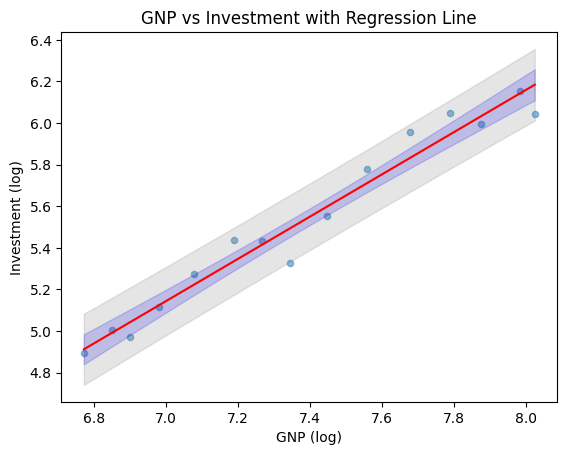

In [10]:
# 6) 

ax = data_invest.plot.scatter(x="gnp", y="invest", alpha=0.5)

abs = np.linspace(min(data_invest["gnp"]), max(data_invest["gnp"]), 100)
ord = beta0_esti + beta1_esti * abs
CI_1 = ord + t_quartile*np.sqrt(sigma_sqrd)*np.sqrt(1/n + ((abs-x_mean)**2)/b)
CI_0 = ord - t_quartile*np.sqrt(sigma_sqrd)*np.sqrt(1/n + ((abs-x_mean)**2)/b)

PI_1 = ord + t_quartile*np.sqrt(sigma_sqrd)*np.sqrt(1 + 1/n + ((abs-x_mean)**2)/b)
PI_0 = ord - t_quartile*np.sqrt(sigma_sqrd)*np.sqrt(1 + 1/n + ((abs-x_mean)**2)/b)

ax.fill_between(abs, CI_1, CI_0, color='blue', alpha=0.2, label='Confidence interval')
ax.fill_between(abs, PI_1, PI_0, color='gray', alpha=0.2, label='Prediction interval')
plt.plot(abs, ord, color='red')
plt.xlabel('GNP (log)')
plt.ylabel('Investment (log)')
plt.title('GNP vs Investment with Regression Line')

plt.show()

In [11]:
# 7) Estimation of the intercept, the slope, the determination coefficient and the prediction of the necessary Investement for GNP=1000 with 
# existing implementation 
from sklearn.linear_model import LinearRegression

# Preparation of the data

x = data_invest[['gnp']].values #2D-array expected because scikit-learn expectfeatures => herre it's one colonne of features only
y = data_invest['invest'].values

# Training of the model

model = LinearRegression()

model.fit(x,y)

y_pred = model.predict([[x_new]])

beta1_model = model.coef_[0]
beta0_model = model.intercept_
determination_coef = model.score(x,y)

print("Investment prediction of the model:", np.exp(y_pred[0]))
print("Estimated intercept of the model:", beta0_model)
print("Slope prediction of the model:", beta1_model)
print("Determination coefficient of the model:", determination_coef)



Investment prediction of the model: 155.97942793105494
Estimated intercept of the model: -1.9635913352301833
Slope prediction of the model: 1.0152814015988711
Determination coefficient of the model: 0.9627572956057855


Thus, we obtain the same results with implemented version of scikit-learn than thhe one manually done. 

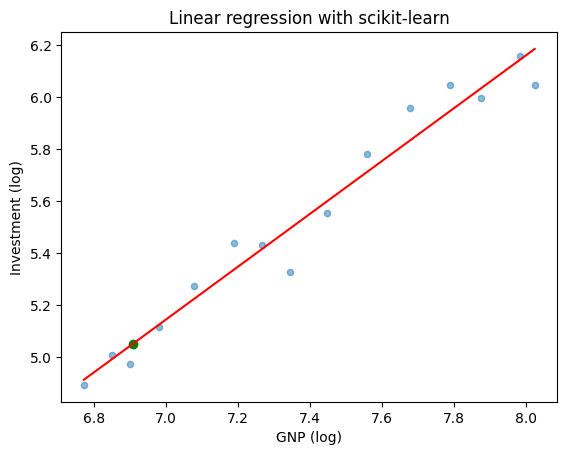

In [12]:
# 8) Plotting the result from the sciktit-learn linear regression method

ax = data_invest.plot.scatter(x='gnp',y='invest', alpha=0.5)

abs_model = np.linspace(min(x), max(x), 100)
ord_model = model.predict(abs_model)

plt.plot(abs_model, ord_model, color='red')
plt.title('Linear regression with scikit-learn')
plt.xlabel('GNP (log)')
plt.ylabel('Investment (log)')

plt.scatter (x_new, y_pred, color='green', label='Prediction point for GNP = 1000')


In [13]:
# 9) 

# First we calculate the associated Gram matrix 

l0 = np.ones(n)
l1 = data_invest['gnp'].values
l2 = data_invest['interest'].values

X = pd.DataFrame({"intercept" : l0, "gnp" : l1, "interest" : l2})
X = X.values

Gram_matrix = X.T @ X

rank = np.linalg.matrix_rank(Gram_matrix)

if rank == X.shape[1]:
    print("Gram matrix is of full rank.")
else :
    print("Gram matrix is not of full rank.")

Gram matrix is of full rank.


In [14]:
# 10) 

n = data_invest.shape[0] # numbers of samples in our data set
p = 2 # number of features

inv_Gram = np.linalg.inv(Gram_matrix)

Y = data_invest['invest'].values.reshape(-1,1)


reg_coef = inv_Gram @ X.T @ Y

sigma_sqrd = np.sum((Y - (X @ reg_coef))**2)/(n-(p+1))

C = sigma_sqrd * inv_Gram

R_coef = (np.sum((X @ reg_coef - np.mean(Y))**2))/(np.sum((Y - np.mean(Y))**2))

variance0 = C[0,0]
variance1 = C[1,1]
variance2 = C[2,2]

print("First regression coefficient (0):", reg_coef[0])
print("Second regression coefficient (1):", reg_coef[1])
print("Third regression coefficient (2)", reg_coef[2])
print("Determination coefficient for the linear regression:", R_coef)

# Construction of the Student-t test under H0 hypothesis (null hypothesis for each regression coefficient)

test_stat_0 = (reg_coef[0]/np.sqrt(variance0))[0]
test_stat_1 = (reg_coef[1]/np.sqrt(variance1))[0]
test_stat_2 = (reg_coef[2]/np.sqrt(variance2))[0]

p_value_0 = 2*(1 - stats.t.cdf(np.abs(test_stat_0), n-(p+1)))
p_value_1 = 2*(1 - stats.t.cdf(np.abs(test_stat_1), n-(p+1)))
p_value_2 = 2*(1 - stats.t.cdf(np.abs(test_stat_2), n-(p+1)))

print("Test statistic value for regression coefficient 0:", test_stat_0)
print("p-value for the test statistic for the regression coefficient 0:", p_value_0)
print("Test statistic value for regression coefficient 1:", test_stat_1)
print("p-value for the test statistic for the regression coefficient 1:", p_value_1)
print("Test statistic value for regression coefficient 2:", test_stat_2)
print("p-value for the test statistic for the regression coefficient 2:", p_value_2)

First regression coefficient (0): [-2.18045473]
Second regression coefficient (1): [1.05124269]
Third regression coefficient (2) [-0.00652888]
Determination coefficient for the linear regression: 0.9633108306729021
Test statistic value for regression coefficient 0: -3.2917532707865944
p-value for the test statistic for the regression coefficient 0: 0.006438367050913163
Test statistic value for regression coefficient 1: 10.300102852640372
p-value for the test statistic for the regression coefficient 1: 2.5995168484449493e-07
Test statistic value for regression coefficient 2: -0.42549479612469876
p-value for the test statistic for the regression coefficient 2: 0.6780071418831035


We can reject the null hypothesis for the first two regression coefficients since their p-values are very small (in comparison to the level of the test). However, we cannot say the same for the last regression coefficient since th ep-value is high. Thus, we cannot reject or aprove the null hypothesis, we conserve the status quo. 

In [15]:
# 11) Predict the log(Investment) for GNP = 1000 and Interest = 10

val = np.array([1,np.log(1000),10]).reshape(3,1)
pred = (val.T @ reg_coef)[0][0]
print("Predicted Investment value (for GNP = 1000 and Interest = 10):", np.exp(pred))

alpha = 0.01
t = stats.t.ppf(1-alpha/2,n-(p+1))

CI_upper = np.exp(pred)*np.exp(t*np.sqrt(sigma_sqrd*(val.T@inv_Gram@val)[0][0]))
CI_lower = np.exp(pred)*np.exp(-t*np.sqrt(sigma_sqrd*(val.T@inv_Gram@val)[0][0]))

PI_upper = np.exp(pred)*np.exp(t*np.sqrt(sigma_sqrd*(1 + (val.T@inv_Gram@val)[0][0])))
PI_lower = np.exp(pred)*np.exp(-t*np.sqrt(sigma_sqrd*(1 + (val.T@inv_Gram@val)[0][0])))

print("Confidence interval for the prediction:", [CI_lower,CI_upper])
print("Prediction interval for the prediction:", [PI_lower,PI_upper])

Predicted Investment value (for GNP = 1000 and Interest = 10): 150.80441472094728
Confidence interval for the prediction: [np.float64(115.59946882657016), np.float64(196.7307612238811)]
Prediction interval for the prediction: [np.float64(102.7633214534174), np.float64(221.3043640248276)]


Text(0.5, 0.92, 'Investment as a function of GNP and Interest')

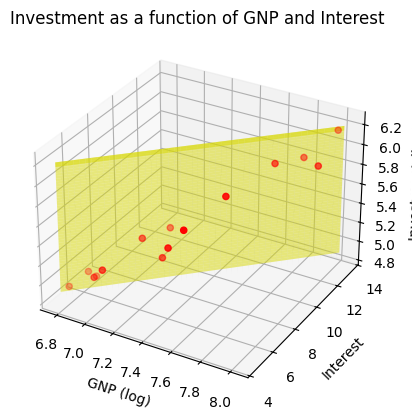

In [16]:
# 12) Plot the data and the regression plane on 3D

from mpl_toolkits.mplot3d import Axes3D

x = data_invest['gnp'].values
y = data_invest['interest'].values
z = data_invest['invest'].values
reg_x = np.linspace(min(x), max(x), 100)
reg_y = np.linspace(min(y), max(y), 100)
X_reg = np.array([[1, i, j] for i in reg_x for j in reg_y])
reg_z = X_reg @ reg_coef

# Conffidence and prediction intervals are missing here

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='r', marker='o')

ax.plot_surface(reg_x, reg_y, reg_z, alpha=0.5, color='yellow')

ax.set_xlabel('GNP (log)')
ax.set_ylabel('Interest')
ax.set_zlabel('Investment (log)')
ax.set_title('Investment as a function of GNP and Interest')


Estimated regression coefficients with scikit-learn: -2.180454725911403 1.05124269131966 -0.006528879406068303
Investment prediction with scikit-learn: 150.80441472087134
Determination coefficient with scikit-learn: 0.9633108306726242


/Users/louis/.venv_global/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/louis/.venv_global/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0.5, 0.92, 'Investment as a function of GNP and Interest with scikit-learn')

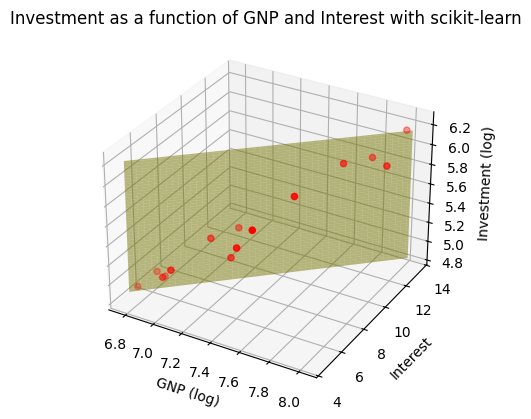

In [17]:
# 13) Estimation of the regression coefficients with scikit-learn

model = LinearRegression()
model.fit(data_invest[['gnp', 'interest']], data_invest['invest'])

print("Estimated regression coefficients with scikit-learn:", model.intercept_, model.coef_[0], model.coef_[1])

pred_sklearn = model.predict([[np.log(1000), 10]])
print("Investment prediction with scikit-learn:", np.exp(pred_sklearn[0]))

score = model.score(data_invest[['gnp', 'interest']], data_invest['invest'])
print("Determination coefficient with scikit-learn:", score)

# Plot the data and the regression plane on 3D with scikit-learn

x = data_invest['gnp'].values
y = data_invest['interest'].values
z = data_invest['invest'].values
reg_x = np.linspace(min(x), max(x), 100)
reg_y = np.linspace(min(y), max(y), 100)
X_reg = np.array([[i, j] for i in reg_x for j in reg_y])
reg_z = model.predict(X_reg).reshape(100,100)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='r', marker='o')

ax.plot_surface(reg_x, reg_y, reg_z, alpha=0.5, color='yellow')

ax.set_xlabel('GNP (log)')
ax.set_ylabel('Interest')
ax.set_zlabel('Investment (log)')
ax.set_title('Investment as a function of GNP and Interest with scikit-learn')

We do retrieve the same results with implemented method on scikit-learn than with the hand made calculations. 